# Importance Sampling
### Evaluating Integrals using Monte Carlo



In [21]:
#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import pandas as pd

In [22]:
SAMPLE_SIZE = 10000
TRIALS = 100

# Q1. ∫sin(x)dx from [0,π/2]

=cos(x)[at 0 - at π/2] = 1.0

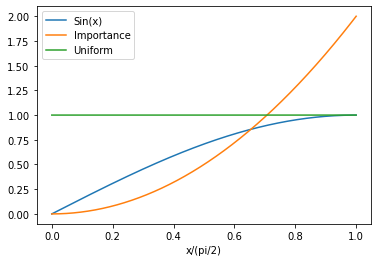

In [23]:
q1_res = 1.0
x = np.linspace(start=0,stop=np.pi/2,num=SAMPLE_SIZE)
fx = np.sin(x)
q1_d = (8*x*x)/(np.pi*np.pi)
q1_u = np.ones_like(q1_d)
plt.plot(2*x/np.pi,fx)
plt.plot(2*x/np.pi,q1_d)
plt.plot(2*x/np.pi,q1_u)
plt.legend(['Sin(x)','Importance','Uniform'])
plt.xlabel('x/(pi/2)')
plt.show()

In [24]:
#Uniform Sampling
def q1_uniform():
    q1_uniform = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_uniform = np.append(q1_uniform, fx[z]*q1_u[z])

    #print(np.sum(q1_uniform)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_uniform)*np.pi/(2*SAMPLE_SIZE)

In [25]:
#prob distribution fxn fx = 8(x^2)/(pi^2)
def q1_importance():
    q1_distrib = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_distrib = np.append(q1_distrib, fx[z]*q1_d[z])

    #print(np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE)

In [26]:
q1_uniform_res = np.zeros(TRIALS)
q1_importance_res = np.zeros(TRIALS)

q1_uniform_error = np.zeros(TRIALS)
q1_importance_error = np.zeros(TRIALS)

for i in range(TRIALS):
    q1_uniform_res[i] = q1_uniform()
    q1_uniform_error[i] = np.abs(q1_uniform_res[i]-q1_res)
    q1_importance_res[i] = q1_importance()
    q1_importance_error[i] = np.abs(q1_importance_res[i]-q1_res)

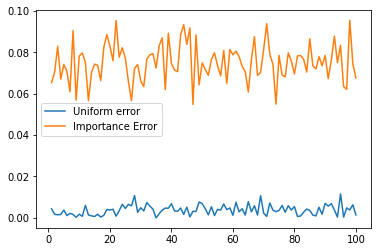

     I_uniform  error_uniform  I_importance  error_importance
1     0.995622       0.004378      0.934661          0.065339
2     0.998258       0.001742      0.929677          0.070323
3     0.998463       0.001537      0.917178          0.082822
4     1.001664       0.001664      0.932967          0.067033
5     0.996209       0.003791      0.926000          0.074000
..         ...            ...           ...               ...
96    0.999626       0.000374      0.936613          0.063387
97    1.004802       0.004802      0.937949          0.062051
98    1.003843       0.003843      0.904575          0.095425
99    0.993676       0.006324      0.925624          0.074376
100   1.001447       0.001447      0.932458          0.067542

[100 rows x 4 columns]


In [27]:
q1_data = pd.DataFrame({'I_uniform':q1_uniform_res,
            'error_uniform':q1_uniform_error,
            'I_importance':q1_importance_res,
            'error_importance':q1_importance_error})
index_ = np.arange(TRIALS)
q1_data.index = index_+1
plt.plot(index_+1,q1_uniform_error)
plt.plot(index_+1,q1_importance_error)
plt.legend(['Uniform error','Importance Error'])
plt.show()
print(q1_data)

# Q2. ∫exp(-x)dx from [0,1]
= exp(-x) at 0 - exp(-x) at 1 = 1 - 1/e 

Based on the below graph, we cam take a sample 1-x/2 that would fit it better

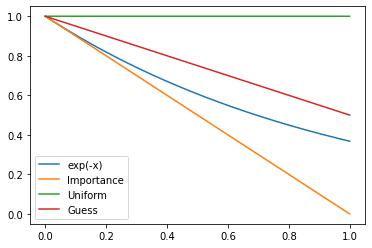

In [28]:
q2_res = 1.0 - (1/np.e)
x = np.linspace(start=0,stop=1,num=SAMPLE_SIZE)
fx = np.exp(-1.0*x)
q2_d = 1-x
q2_u = np.ones_like(q2_d)
q2_g = 1-x/2
plt.plot(x,fx)
plt.plot(x,q2_d)
plt.plot(x,q2_u)
plt.plot(x,q2_g)
plt.legend(['exp(-x)','Importance','Uniform','Guess'])
plt.show()

In [29]:
#Uniform Sampling
def q2_uniform():
    q2_uniform = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q2_uniform = np.append(q2_uniform, fx[z]*q2_u[z])

    #print(np.sum(q2_uniform)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q2_uniform)/(SAMPLE_SIZE)

In [30]:
#prob distribution fxn fx = 1-x
def q2_importance():
    q2_distrib = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q2_distrib = np.append(q2_distrib, fx[z]*q2_d[z])

    #print(np.sum(q2_distrib)/SAMPLE_SIZE))
    return np.sum(q2_distrib)/(SAMPLE_SIZE)

In [31]:
#prob distribution fxn fx = 1-x/2
def q2_guess():
    q1_gs = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_gs = np.append(q1_gs, fx[z]*q2_g[z])

    #print(np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_gs)/(SAMPLE_SIZE)

In [32]:
q2_uniform_res = np.zeros(TRIALS)
q2_importance_res = np.zeros(TRIALS)
q2_guess_res = np.zeros(TRIALS)

q2_uniform_error = np.zeros(TRIALS)
q2_importance_error = np.zeros(TRIALS)
q2_guess_error = np.zeros(TRIALS)

for i in range(TRIALS):
    q2_uniform_res[i] = q2_uniform()
    q2_uniform_error[i] = np.abs(q2_uniform_res[i]-q2_res)/q2_res
    q2_importance_res[i] = q2_importance()
    q2_importance_error[i] = np.abs(q2_importance_res[i]-q2_res)/q2_res
    q2_guess_res[i] = q2_guess()
    q2_guess_error[i] = np.abs(q2_guess_res[i]-q2_res)/q2_res

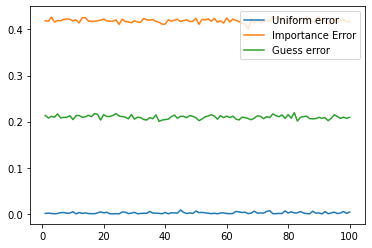

     I_uniform  error_uniform  I_importance  error_importance   I_guess  \
1     0.632796       0.001069      0.367312          0.418921  0.497166   
2     0.633207       0.001718      0.368111          0.417657  0.500745   
3     0.632735       0.000972      0.362430          0.426644  0.498447   
4     0.632271       0.000239      0.369197          0.415938  0.499654   
5     0.632750       0.000995      0.367099          0.419257  0.495066   
..         ...            ...           ...               ...       ...   
96    0.631611       0.000807      0.369367          0.415669  0.498561   
97    0.633454       0.002110      0.366479          0.420238  0.501320   
98    0.635443       0.005256      0.365320          0.422072  0.499558   
99    0.632812       0.001093      0.369120          0.416061  0.501211   
100   0.634817       0.004266      0.368690          0.416741  0.499683   

     error_guess  
1       0.213495  
2       0.207833  
3       0.211469  
4       0.209559  
5   

In [33]:
q2_data = pd.DataFrame({'I_uniform':q2_uniform_res,
            'error_uniform':q2_uniform_error,
            'I_importance':q2_importance_res,
            'error_importance':q2_importance_error,
            'I_guess':q2_guess_res,
            'error_guess':q2_guess_error})
index_ = np.arange(TRIALS)
q2_data.index = index_+1
plt.plot(index_+1,q2_uniform_error)
plt.plot(index_+1,q2_importance_error)
plt.plot(index_+1,q2_guess_error)
plt.legend(['Uniform error','Importance Error','Guess error'])
plt.show()
print(q2_data)

# Q3 Boltzmann distribution

ρ(v) = (m/2πkT)^(0.5) exp(-mv^2/2kT)

In [34]:
k = 1.380649E+0
m = 1
T = 300
L = 100
ns = 50000

In [35]:
def boltzmann_rand(T,FLAG = False):
    while(FLAG==False):
        z = int((rand.random()-0.5)*L*2) 
        p = rand.random()
        rho = np.sqrt(m/((2*np.pi)*k*T)) * np.exp(-1.0*m*z*z/(2.0*k*T))
        if p <= rho:
            return z
            FLAG==True

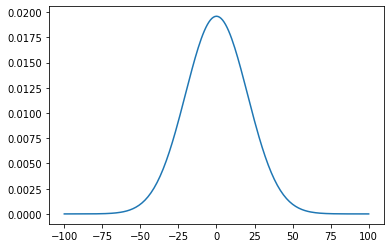

In [36]:
Z = np.linspace(start=-1*L,stop=L,num=2*L+1)
Y = np.sqrt(m/(2*np.pi*k*T)) * np.exp(-1.0*m*Z*Z/(2.0*k*T))
plt.plot(Z,Y)
plt.show()
#for i in range(100):
#    print(boltzmann_rand(300))

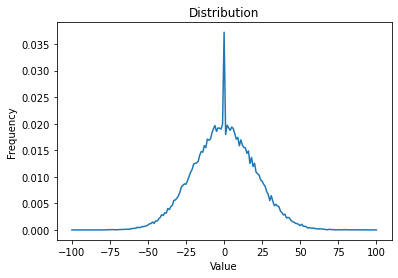

In [39]:
arr = np.zeros((ns),dtype=int)
for i in range(ns):
    arr[i] = boltzmann_rand(T)

boltzmann_data = np.zeros((2*L+1),dtype=int)
for i in range(ns):
    boltzmann_data[arr[i]+L]+=1

plt.plot(Z,boltzmann_data/ns)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()